In [11]:
import matplotlib.pyplot as plt
import scipy.signal as signal
import numpy as np
%matplotlib inline

In [12]:
#First define some input parameters for the signal:
#
A = 2.
w = 1.
phi = 0.5 * np.pi
nin = 1000
nout = 1000
frac_points = 0.9 # Fraction of points to select

#Randomly select a fraction of an array with timesteps:
r = np.random.rand(nin)
x = np.linspace(0.01, 10*np.pi, nin)
dx=x[1]-x[0]
x = x[r >= frac_points]
print(x[len(x)-1],len(x))

(30.629992438402986, 105)


In [13]:
#Plot a sine wave for the selected times:

y = A * np.sin(w*x+phi)+0.5*A*np.sin(1.5*w*x)

# Define the array of frequencies for which to compute the periodogram:
min_fraq=1./x[len(x)-1]
max_fraq=1./(2.*dx)
#f = np.linspace(0.01, 4., nout)
f = np.linspace(min_fraq, max_fraq, nout)

#Calculate Lomb-Scargle periodogram:
#pgram = signal.lombscargle(x, y, f, normalize=False)
pgram = signal.lombscargle(x, y, f)#,normalize=True)


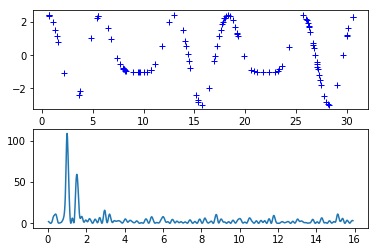

In [14]:
#Now make a plot of the input data:

plt.subplot(2, 1, 1)
plt.plot(x, y, 'b+')

#Then plot the normalized periodogram:

plt.subplot(2, 1, 2)
plt.plot(f, pgram)
plt.show()

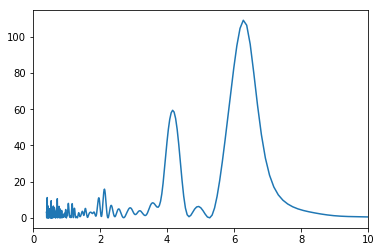

In [15]:
period=[]
period=2.*np.pi/f
plt.xlim([0.,10.])
plt.plot(period,pgram)

## FFT transform

In [16]:
# для fft нужна равномерная сетка
xt = np.linspace(0.01, 10*np.pi, 200)
F=A * np.sin(w*xt+phi)
FY=np.fft.fft(F)

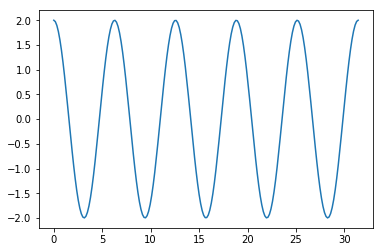

In [17]:
plt.plot(xt,F)

In [18]:
N=len(F)
Np=int(N/2)
dt=xt[1]-xt[0]
wf=np.fft.fftfreq(N, dt) #частоты

(0, 8)

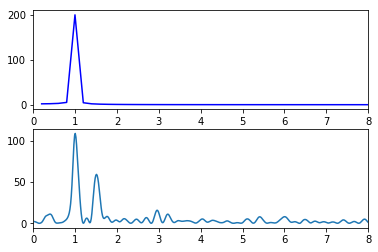

In [19]:

plt.subplot(2, 1, 1)
plt.xlim(0,8)
plt.plot(2.*np.pi*wf[1:Np],abs(FY[1:Np]), 'b-')

plt.subplot(2, 1, 2)
plt.plot(f, pgram)
plt.xlim(0,8)

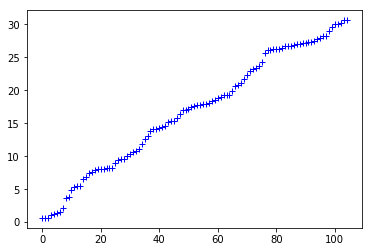

In [20]:
plt.plot(x,'b+')